Please remember that in order to run the code in this notebook you must have either already fit your own LSTM and AutoML models and gotten diagnostic statistics or imported the ones from my GitHub

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
analysis_years = list(range(2003, 2018))

# Load models

## LSTM

In [4]:
with open('lstm/sufficient_info.json') as json_file:
    lstm_info = json.load(json_file)

## AutoML

In [5]:
with open('automl/sufficient_info.json') as json_file:
    automl_info = json.load(json_file)

## Bayes

In [6]:
with open('bayes/sufficient_info.json') as json_file:
    bayes_info = json.load(json_file)

# Plot residuals

In [7]:
xmin = 0
xmax = 0.8

In [8]:
sns.set_style('whitegrid',
       {'axes.facecolor': (0, 0, 0, 0),
        'figure.facecolor': (0, 0, 0, 0)})
sns.set_context('talk')

In [10]:
# prep data
lstm_train_mae = [lstm_info[key]['train_mae'] for key in lstm_info.keys()]
automl_train_mae = [automl_info[key]['train_mae'] for key in automl_info.keys()]
bayes_train_mae = [bayes_info[key]['train_mae'] for key in bayes_info.keys()]

lstm_test_mae = [lstm_info[key]['test_mae'] for key in lstm_info.keys()]
automl_test_mae = [automl_info[key]['mae'] for key in automl_info.keys()]
bayes_test_mae = [bayes_info[key]['test_mae'] for key in bayes_info.keys()]

train_test = ['train'] * 15 + ['test'] * 15

train = pd.DataFrame({
    'Long Short\nTerm Memory': lstm_train_mae + lstm_test_mae,
    'AutoML': automl_train_mae + automl_test_mae,
    'Naive Bayes': bayes_train_mae + bayes_test_mae,
    'train_test': train_test
})
plotdata = pd.melt(train, id_vars=['train_test'], value_vars=['Long Short\nTerm Memory', 'AutoML', 'Naive Bayes'])
# value_vars=['lstm', 'automl', 'bayes'])

In [11]:
plotdata.head()

,train_test,variable,value
0,train,Long Short\nTerm Memory,0.198292
1,train,Long Short\nTerm Memory,0.115388
2,train,Long Short\nTerm Memory,0.181155
3,train,Long Short\nTerm Memory,0.124783
4,train,Long Short\nTerm Memory,0.128992


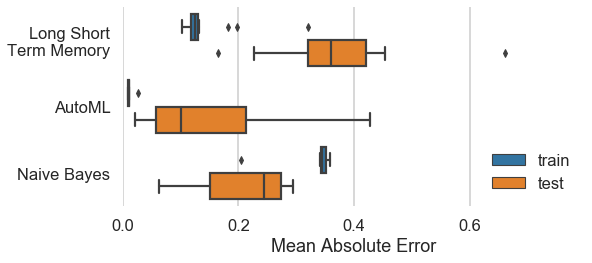

In [12]:
# plot
fig, ax = plt.subplots()

# base plot
ax = sns.boxplot(x="value", y="variable",
                 hue='train_test', data=plotdata,
                linewidth=2.2)
# sns.stripplot(x='value', y='variable', 
#               hue='train_test', data=plotdata,
#               ax=ax, orient='h', color=".5", dodge=True)

# set aesthetics
ax.set_xlim((xmin, xmax))
ax.set_ylabel('')
ax.set_xlabel('Mean Absolute Error')
plt.box(False)
ax.set_alpha(0)
ax.set_xticks([0, 0.2, 0.4, 0.6], minor=False)
ax.set_xticks([0.1, 0.3, 0.5, 0.7], minor=True)
ax.tick_params(axis='x', which='major', color='b')
ax.tick_params(axis='x', which='minor', color='w')

# legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='', frameon=True, ncol=1, loc='lower right', facecolor='white', edgecolor='white')

plt.tight_layout()
fig.set_figwidth(10)
fig.savefig('residuals.png', dpi=900, transparent=True)

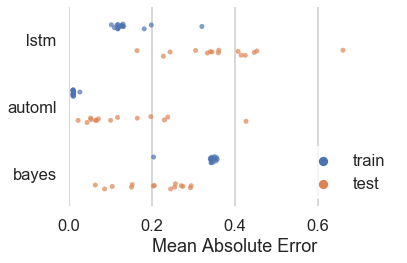

In [149]:
# plot
fig, ax = plt.subplots()

# base plot
sns.stripplot(x='value', y='variable', 
              hue='train_test', data=plotdata,
              ax=ax, orient='h', alpha=0.7, dodge=True,
              palette='deep')

# set aesthetics
ax.set_xlim((xmin, xmax))
ax.set_ylabel('')
ax.set_xlabel('Mean Absolute Error')
plt.box(False)
ax.set_alpha(0)
ax.set_xticks([0, 0.2, 0.4, 0.6], minor=False)
ax.set_xticks([0.1, 0.3, 0.5, 0.7], minor=True)
ax.tick_params(axis='x', which='major', color='b')
ax.tick_params(axis='x', which='minor', color='w')

# legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='', frameon=True, ncol=1, loc='lower right', facecolor='white', edgecolor='white')

plt.tight_layout()
fig.savefig('residuals.png', dpi=300, transparent=True)

# Plot forecasts